<!-- 
<div style="background-image: url('https://cdn.sanity.io/images/0vv8moc6/psychtimes/64539c88b6fd2aebe06c1389a0e4d3b5d010db92-5616x3744.jpg?fit=crop&amp;auto=format'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 38px; font-family: avenir;">Multi-Class Prediction of Obesity Risk</h1>







</div> -->



<div style="background-image: url('https://cdn.sanity.io/images/0vv8moc6/psychtimes/64539c88b6fd2aebe06c1389a0e4d3b5d010db92-5616x3744.jpg?fit=crop&amp;auto=format'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 35px; font-family: avenir;">Multi-Class Prediction of Obesity Risk</h1>







</div>

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Overview
The analysis involves examining various factors to understand their influence on obesity types. This process is crucial for healthcare professionals, policy makers, and individuals to make informed decisions about health and lifestyle choices.

### Dataset
The dataset used for this analysis comprises numerous features, including 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', and 'NObeyesdad'. These variables provide essential insights into individual characteristics and lifestyle habits, which are instrumental in understanding obesity types.

### Objectives
1. Develop a comprehensive understanding of the relationships between different factors and obesity types.
2. Investigate the impact of different factors such as gender, family history, physical activity, dietary habits, age, and weight on obesity types.
3. Provide valuable insights to healthcare professionals, policy makers, and individuals to facilitate better decision-making regarding health and lifestyle choices.

### Methodology
1. **Data Collection and Preprocessing**: Gather comprehensive datasets and preprocess them by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Feature Engineering**: Extract relevant features and potentially create new ones to enhance the understanding of obesity types.
3. **Data Analysis**: Explore various statistical methods to identify the relationships and dependencies between different factors and obesity types.
4. **Data Interpretation**: Interpret the results of the data analysis to gain insights into the underlying factors influencing obesity types.


<!-- <div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;"> -->
    
## Libraries

In [1]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 

# Data Transformation
from sklearn.preprocessing import LabelEncoder, RobustScaler, PolynomialFeatures, StandardScaler

# Feature Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Pipeline
from sklearn.pipeline import Pipeline
import joblib

# Metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import silhouette_score

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
import optuna

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import math

%load_ext memory_profiler



%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
    
### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
5. [**Data Splitting**](#sixth): Split the training dataset into features (x) and the target variable (y) to prepare for model training.
6. [**Model Selecting and Training**](#seventh): Utilize machine learning algorithms to train a predictive model on the training data.
7. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.
8. [**Model Tuning**](#nine): Optimize model hyperparameters or configurations to improve performance.
9. [**Test Submission**](#ten): Submitting Test dataset for valuation.



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='first'></a> Loading Data

In [2]:
# Path to the CSV data file
TRAIN_DATAPATH = './data/train.csv'
TEST_DATAPATH = './data/test.csv'

# # Reading data from the CSV file into a DataFrame
train = pd.read_csv(TRAIN_DATAPATH) 
test = pd.read_csv(TEST_DATAPATH) 

# Concatenating train and test dataframes along axis 0 (rows) to combine them into a single dataframe.
df = pd.concat([train, test], axis=0)


# Displaying the first few rows of the DataFrame
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Dropping the 'id' column from the dataframe.
df.drop(columns='id', inplace=True)


In [4]:
# Initialize empty lists to store object and non-object columns
obj = []
ints = []

# Loop through DataFrame columns
for col in df.columns:
    # Check if column data type is object
    if df[col].dtype == 'object':
        # If object, append column name, unique values count, and count of missing values to 'obj' list
        obj.append((col, df[col].nunique(), df[col].isna().sum()))
    else:
        # If non-object, append column name, unique values count, and count of missing values to 'ints' list
        ints.append((col, df[col].nunique(), df[col].isna().sum(), df[col].skew()))

# Determine the maximum length of 'obj' and 'ints' lists
max_len = max(len(obj), len(ints))

# Extend 'obj' and 'ints' lists with empty tuples to match the maximum length
obj.extend([('', '', '')] * (max_len - len(obj)))
ints.extend([('', '', '', '')] * (max_len - len(ints)))

# Create a dictionary with keys representing column categories and values representing lists of corresponding data
data = {
    'Categorical_columns': [x[0] for x in obj],
    'cat_cols_uniques': [x[1] for x in obj],
    'cat_cols_missing': [x[2] for x in obj],
    'Numeric_columns': [x[0] for x in ints],
    'int_cols_uniques': [x[1] for x in ints],
    'int_cols_missing': [x[2] for x in ints],
    'int_cols_skew': [x[3] for x in ints]
}

# Convert the dictionary into a pandas DataFrame
pd.DataFrame(data)




,Categorical_columns,cat_cols_uniques,cat_cols_missing,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,Gender,2,0,Age,1934,0,1.580927
1,family_history_with_overweight,2,0,Height,2070,0,0.035495
2,FAVC,2,0,Weight,2318,0,0.09087
3,CAEC,4,0,FCVC,1054,0,-0.351009
4,SMOKE,2,0,NCP,793,0,-1.552479
5,SCC,2,0,CH2O,1734,0,-0.206969
6,CALC,4,0,FAF,1539,0,0.514904
7,MTRANS,5,0,TUE,1436,0,0.682085
8,NObeyesdad,7,13840,,,,


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
**Categorical Columns:**
- The dataset includes several categorical variables such as 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', and 'NObeyesdad'.
- These categorical variables have different numbers of unique values, ranging from 2 ('Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC') to 7 ('NObeyesdad'). 
- There are no missing values in these categorical columns, except for 'NObeyesdad', which has 13840 missing values.

**Numeric Columns:**
- The dataset also includes several numeric variables such as 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', and 'TUE'.
- These numeric variables have different numbers of unique values, ranging from 793 ('NCP') to 2318 ('Weight').
- There are no missing values in these numeric columns.
- The skewness of these numeric columns varies, indicating different levels of asymmetry around the mean. For instance, 'Age' has a positive skew (1.580927), indicating that the distribution has a long right tail. On the other hand, 'NCP' has a negative skew (-1.552479), indicating that the distribution has a long left tail.



In [5]:
# Printing out the column names of the dataframe.
print(df.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


<!-- <div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE);background-image: url('https://www.icegif.com/wp-content/uploads/fat-lady-singing-icegif-4.gif'); border: 2px solid #000; border-radius: 10px; font-family: avenir;"> -->

<div style="position: relative; padding: 10px; background-image: linear-gradient(to right, #ECE3CE, #fffff); border: 2px solid #000; border-radius: 10px; font-family: avenir;">



<div style="position: absolute; bottom: 0; right: 0; width: 300px; height: 300px; background-image: url('https://www.icegif.com/wp-content/uploads/fat-lady-singing-icegif-4.gif'); background-size: cover;border-radius: 10px;"></div>




- **Gender**: The gender of the individual (e.g., Male, Female).
- **Age**: The age of the individual in years.
- **Height**: The height of the individual in meters.
- **Weight**: The weight of the individual in kilograms.
- **Family_history_with_overweight**: Indicates whether there is a family history of overweight or obesity (e.g., Yes, No).
- **FAVC**: Whether the individual consumes high caloric food frequently (e.g., Yes, No).
- **FCVC**: Frequency of consumption of vegetables (e.g., numerical scale).
- **NCP**: Number of main meals per day (e.g., numerical scale).
- **CAEC**: Consumption of food between meals (e.g., Always, Frequently, Sometimes, No).
- **SMOKE**: Smoking habit (e.g., Yes, No).
- **CH2O**: Daily water consumption in liters (e.g., numerical scale).
- **SCC**: Calories consumption monitoring (e.g., Yes, No).
- **FAF**: Physical activity frequency (e.g., numerical scale).
- **TUE**: Time using technology devic

</div>


In [6]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(34598, 17)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='second'></a> Data Preprocessing

In [7]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             34598

In [8]:
# Displaying the data types of each column in the DataFrame
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [9]:
# Calculate the sum of missing values for each column and reset the index, storing the result in a new DataFrame called 'isna'
isna = df.isna().sum().reset_index(name="missing_values")

# Calculate the percentage of missing values for each column and add it as a new column called 'percentage' in the 'isna' DataFrame
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Sort the 'isna' DataFrame by the 'missing_values' column in descending order and display the top 35 rows
isna.sort_values(by='missing_values', ascending=False)


,index,missing_values,percentage
16,NObeyesdad,13840,40.0
9,SMOKE,0,0.0
15,MTRANS,0,0.0
14,CALC,0,0.0
13,TUE,0,0.0
12,FAF,0,0.0
11,SCC,0,0.0
10,CH2O,0,0.0
0,Gender,0,0.0
1,Age,0,0.0


In [10]:
# Counting the number of duplicated rows in the DataFrame 
df.duplicated().value_counts()


False    34598
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Preprocessing the Column Names

In [11]:
# Converting column names to lowercase.
df.columns = df.columns.str.lower()

# Displaying the first few rows of the dataframe.
df.head()


,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Outliers and inconsistent data

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px;font-family: avenir;"> 

### Z-score Plot for Numerical Columns

This code snippet generates a series of subplots to visualize the distribution of Z-scores for each numerical column in the dataset. Z-score, also known as standard score, measures how many standard deviations an observation is from the mean. 

#### Steps:
1. **Select Numerical Columns**: Only the numerical columns are selected from the dataset using `select_dtypes` function.

2. **Calculate Plot Layout**: The number of subplots, rows, and columns are calculated based on the number of numerical columns.

3. **Set Figure Size**: The size of the figure is adjusted based on the number of rows.

4. **Iterate Through Numerical Columns**: For each numerical column, a subplot is created. Z-scores are calculated for each column and plotted against the index. A threshold line is drawn at Z-score of 3 and -3 to indicate outliers.

#### Interpretation:
- Points above the red dashed line (Z-score > 3) or below the red dashed line (Z-score < -3) are considered outliers.
- This visualization helps in identifying potential outliers in the dataset for each numerical feature.



In [12]:
# Выберем только числовые столбцы
numerics = df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# <-- uncomment for access to code output -->

# # Set the figure size based on the number of rows
# plt.figure(figsize=(11, 4 * num_rows))

# for i, col in enumerate(numerics, 1):
#     plt.subplot(num_rows, num_columns, i)  
#     z_scores = (numerics[col] - numerics[col].mean()) / numerics[col].std()

#     threshold = 3

#     plt.scatter(np.arange(len(z_scores)), z_scores, color='#FF6868', alpha=0.5)
#     plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
#     plt.axhline(y=-threshold, color='red', linestyle='--')
#     plt.xlabel('Index')
#     plt.ylabel('Z-score')
#     plt.title(f'{" ".join(list(map(str.title, col.split("_"))))}')
#     plt.legend()

# plt.tight_layout()
# plt.savefig('./image/image_01.png')
# plt.show()

![My Image](https://www.dropbox.com/scl/fi/gjmgzqc1vh0wr92gwz5l0/image_01.png?rlkey=2tkxdfqkryglgr8bktp952478&st=lmr66o77&dl=1)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center;font-family: avenir;">
    
# <a id='third'></a> Exploratory Data Analysis

In [63]:
# Generate descriptive statistics for all numerical columns
df.describe()

,age,height,weight,fcvc,ncp,ch2o,faf,tue,bmi
count,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000
mean,3.191320,1.699721,87.686451,2.444704,1.387493,2.030469,0.978861,0.614467,30.194286
std,0.208120,0.087895,26.273493,0.532568,0.148758,0.609566,0.839122,0.604475,8.309708
min,2.708050,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.812830
25%,3.044522,1.631856,66.000000,2.000000,1.442250,1.784710,0.006892,0.000000,24.023809
50%,3.171857,1.700000,84.000000,2.392179,1.442250,2.000000,1.000000,0.555591,29.384757
75%,3.295837,1.761773,111.539494,3.000000,1.442250,2.550570,1.583832,1.000000,36.915542
max,4.127134,1.980000,165.057269,3.000000,1.587401,3.000000,3.000000,2.000000,54.997991


In [14]:
# Generate descriptive statistics for categorical columns
df.describe(include='object')

,gender,family_history_with_overweight,favc,caec,smoke,scc,calc,mtrans,nobeyesdad
count,34598,34598,34598,34598,34598,34598,34598,34598,20758
unique,2,2,2,4,2,2,4,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,17387,28398,31565,29218,34173,33447,25045,27798,4046


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Visualising Categorical and Numerical features distribution

In [15]:
# Select numerical columns from the DataFrame
numerics = df.select_dtypes(include='number')

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# <-- uncomment for access to code output -->

# # Set the figure size based on the number of rows
# plt.figure(figsize=(11, 4 * num_rows))

# # Iterate over each numerical column and create a histogram subplot
# for i, col in enumerate(numerics, 1):
#     plt.subplot(num_rows, num_columns, i)  # Create subplot
#     mean_values = numerics[col].mean()
#     median = numerics[col].median()

#     sns.histplot(numerics[col], kde=True, color='#638889')  # Plot histogram using seaborn
#     plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
#     plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
#     plt.grid(True, alpha=0.8)  # Add grid lines to the plot
#     plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
#     plt.legend()

# plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.savefig('./image/image_02.png')
# plt.show()  # Display the plots

![My Image](https://www.dropbox.com/scl/fi/8rv5oxq591ljp79gsdpzq/image_02.png?rlkey=s3vd6nwvmu68q52hq3bm6g2cs&st=ddac424x&dl=1)

In [16]:
# Select categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(categorical_cols)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# <-- uncomment for access to code output -->

# # Set the figure size based on the number of rows
# plt.figure(figsize=(11, 4 * num_rows))

# # Iterate over each categorical column and create a histogram subplot
# for i, col in enumerate(df[categorical_cols], 1):
#     mode = df[col].mode()[0]    
#     plt.subplot(num_rows, num_columns, i)  # Create subplot
#     sns.histplot(df[col], color='#638889')  # Plot histogram using seaborn

#     plt.axvline(x=mode, color='#F28585', linestyle='--', label='Mode')

#     plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
#     plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
#     plt.grid(True, alpha=0.8)  # Add grid lines to the plot

# plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.savefig('./image/image_03.png')
# plt.show()  # Display the plots

![My Image](https://www.dropbox.com/scl/fi/t5bp4p8tt9r7js2j20x0q/image_03.png?rlkey=k558jl07omaeurzd2wdzmve74&st=bmdi0n3p&dl=1)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Visualising features distributions and correlation

In [17]:
# <-- uncomment for access to code output -->

# plt.figure(figsize=(7, 6))
# sns.heatmap(df.select_dtypes(include=('number')).corr(), annot=True,
#             cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787',
#                   '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
#                   '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'],
#             annot_kws={"fontsize":8})
# plt.savefig('./image/image_4.png')
# plt.show()

![My Image](https://www.dropbox.com/scl/fi/m2hmxsyqp0rmdigssyq86/image_4.png?rlkey=vv8q2fdojhpzjz8cmrd2fv51f&st=mjr5x8tb&dl=1)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='fifth'></a> Feature Engineering

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">



$ BMI = \frac{weight(kg)}{height(m)^2} $

Where:
- _weight_ represents the individual's weight in kilograms.
- _height_ represents the individual's height in meters.





In [18]:
# Function to calculate BMI (Body Mass Index) based on weight and height.
def bmi(row):
    return row['weight'] / pow(row['height'], 2)

# Applying the bmi function to each row of the dataframe to calculate BMI and create a new column 'bmi'.
df['bmi'] = df.apply(bmi, axis=1)


In [19]:
# Define labels for the bins
labels = ['Very Short', 'Short', 'Medium', 'Tall', 'Very Tall']

# Bin the 'height' column using pd.qcut() and assign labels
df['height_bins'] = pd.qcut(df['height'], 5, labels=labels)

In [20]:
# Defining age range labels.
labels = ['14-20', '21-27', '28-34', '35-41', '42-48', '49-55', '56-61']


# Use pd.qcut() to bin 'age' into 7 quantiles and assign labels
df['age_group'] = pd.qcut(df['age'], 7, labels=labels)

In [21]:
# Counting the occurrences of each category in the 'nobeyesdad' column.
df['nobeyesdad'].value_counts()


nobeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [22]:
# <-- uncomment for access to code output -->

# # Creating a count plot to visualize the distribution of 'nobeyesdad' categories, segmented by 'gender'.
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df, x=df['nobeyesdad'], order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
#                                                   'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
#               hue='gender', palette=['#78a5a3', '#f28585'])
# plt.xticks(rotation=90)
# plt.savefig('./image/image_05.png')
# plt.show()


![My Image](https://www.dropbox.com/scl/fi/3kvv2xbn2oimodm4z99if/image_05.png?rlkey=n7ly08efzxelj8m8hb9i7xzx4&st=z77z6ayn&dl=1)

In [23]:
# <-- uncomment for access to code output -->


# # Creating a scatter plot to visualize the relationship between weight and height, with points colored by gender.
# plt.figure(figsize=(13, 8))
# sns.scatterplot(data=df, x='weight', y='height', hue='gender', palette=['#78a5a3', '#f28585'])

# # Adding regression lines for males and females separately.
# sns.regplot(data=df[df['gender'] == 'Male'], x='weight', y='height', scatter=False, color='#78a5a3')
# sns.regplot(data=df[df['gender'] == 'Female'], x='weight', y='height', scatter=False, color='#f28585')

# plt.savefig('./image/image_06.png')
# plt.show()


![My Image](https://www.dropbox.com/scl/fi/mrtywynhochc3n44wkove/image_06.png?rlkey=w619b9pgjmm66ztqtttpikkpv&st=kk9ngii1&dl=1)

In [24]:
# <-- uncomment for access to code output -->

# # Creating a 2D KDE (Kernel Density Estimation) plot to visualize the joint distribution of weight and height, colored by gender.
# plt.figure(figsize=(13, 8))
# sns.kdeplot(data=df, x='weight', y='height', hue='gender', palette=['#78a5a3', '#f28585'])

# plt.savefig('./image/image_07.png')
# plt.show()

![My Image](https://www.dropbox.com/scl/fi/pb9pbmdnvjo32c13t4hz1/image_07.png?rlkey=t9fb7z0gj6fco1bmy12ess7cw&st=n0vnb1ns&dl=1)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
I noticed several distinct visual clusters. This observation intrigued me, as these clusters could potentially represent underlying structures or relationships within the data. I'm considering delving deeper into this phenomenon to gain a more profound understanding of these clusters and how they might be leveraged to devise new features for my model.

Here's my plan:

1. **find_optimal_clusters(X)**: This function takes a 2D array `X` as input, where each row represents an individual, and the columns represent 'weight' and 'height'. It fits a KMeans model for a range of cluster numbers (from 2 to 10) and calculates the silhouette score for each. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The function returns the number of clusters that gives the highest silhouette score.

2. **create_cluster_features(df, gender)**: This function takes a dataframe `df` and a string `gender` as inputs. It filters the dataframe for the specified gender and extracts the 'weight' and 'height' values. It then calls the `find_optimal_clusters` function to determine the optimal number of clusters for the data. A KMeans model is fitted with the optimal number of clusters, and the cluster labels are predicted. These labels are prefixed with a gender-specific identifier ('M' for 'Male' and 'F' for 'Female') and added to the dataframe in a new column called 'cluster'.


In [25]:

def find_optimal_clusters(X):
    scores = []
    for i in range(2, 11):  # Try different numbers of clusters from 2 to 10
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        scores.append(score)
    return scores.index(max(scores)) + 2  # Return the index of the maximum score plus 2


def create_cluster_features(df, gender):
    X = df[df['gender'] == gender][['weight', 'height']].values
    num_clusters = find_optimal_clusters(X)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    
    # Prefix the cluster labels with a gender-specific identifier
    prefix = 'M' if gender == 'Male' else 'F'
    df.loc[df['gender'] == gender, 'cluster'] = [prefix + str(label) for label in labels]
    return df

# Apply the function for males
df = create_cluster_features(df, 'Male')

# Apply the function for females
df = create_cluster_features(df, 'Female')


In [26]:
# <-- uncomment for access to code output -->

# # Creating a scatter plot to visualize weight versus height, colored by cluster membership.
# plt.figure(figsize=(13, 8))
# sns.scatterplot(data=df, x='weight', y='height', hue='cluster', palette=['#d24136', '#eb8a3e', '#78a5a3', '#785a46',
#                                                                           '#6e6702', '#2e2300', '#1e434c', '#edae01'])
# plt.xlabel('Weight')
# plt.ylabel('Height')
# plt.title('Clusters Visualization')

# plt.savefig('./image/image_08.png')
# plt.show()


![My Image](https://www.dropbox.com/scl/fi/g586wclkxb7ixumsrhvxy/image_08.png?rlkey=gow3n5k31cur7uhzk2jed3c92&st=x7gnlfwt&dl=1)

In [27]:
# <-- uncomment for access to code output -->

# # Create a categorical plot using Seaborn's catplot
# g = sns.catplot(data=df, y='nobeyesdad', hue='calc', kind='box', height=5, aspect=1.5, palette=['#78a5a3', '#b1a087', '#e6a086', '#f28585'])
# g.set_xticklabels(rotation=90)  # Rotate x-axis labels

# plt.savefig('./image/image_09.png')
# # Show the plot
# plt.show()

![My Image](https://www.dropbox.com/scl/fi/cvxfjyn6yj1q4lunss8d1/image_09.png?rlkey=02ur26899uraaklendac1so29&st=0nvewcwp&dl=1)

In [28]:
# <-- uncomment for access to code output -->


# # Creating a count plot to visualize the distribution of 'nobeyesdad' categories, segmented by 'family_history_with_overweight'.
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df, x=df['nobeyesdad'], order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
#                                                   'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
#               hue='family_history_with_overweight', palette=['#78a5a3', '#f28585'])
# plt.xticks(rotation=90)

# plt.savefig('./image/image_10.png')
# plt.show()

![My Image](https://www.dropbox.com/scl/fi/fosedikx6olsjv6d24x4o/image_10.png?rlkey=bvjobdqzv3f06pa2da5r9uphq&st=x6a0k74m&dl=1)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Conclusion

Based on data analysis, here is a detailed summary:

**Clusters and Obesity Types:**
- Female clusters (F0-F5) are associated with different obesity types. F0 is associated with Obesity Type I, F1 and F3 with Obesity Type III, F2 with Insufficient Weight, F4 with Normal Weight, and F5 with Obesity Type III.
- Male clusters (M0-M1) are associated with Overweight Level II and Obesity Type II respectively.

**Physical Activity:**
- The mean activity varies across different clusters for both genders. For females, it's highest in F1 and F5 clusters (around 1.48), and lowest in F3 (0.086944). For males, it's slightly higher in M0 (1.271629) than in M1 (1.084573).
- The mean activity level varies across different clusters for both genders, suggesting that physical activity might be an important factor influencing the obesity type. Regular physical activity can help maintain a healthy weight by balancing caloric intake with energy expenditure.

**Alcohol Consumption and Obesity Types:**
- The frequency of alcohol consumption varies across different obesity types. For instance, Insufficient Weight and Normal Weight categories show a higher frequency of ‘Sometimes’ and ‘No’, while Obesity Type I and Overweight Level II show a higher frequency of ‘Frequently’.
- The data suggests that dietary habits, including alcohol consumption, might play a role in determining the obesity type. Consuming high-calorie foods and beverages can contribute to weight gain, especially when combined with low physical activity levels.The frequency of alcohol consumption varies across different obesity types. This suggests that dietary habits, including alcohol consumption, might play a role in determining the obesity type. Consuming high-calorie foods and beverages can contribute to weight gain, especially when combined with low physical activity levels.

**Family History and Obesity Types:**
- A significant number of females with a family history of overweight fall into the Obesity Type III category (4040), followed by Obesity Type I (1257), and Overweight Level I (750). For males with a family history of overweight, the highest number fall into Obesity Type II (3235), followed by Overweight Level II (1633), and Obesity Type I (1605).
- The data indicates that individuals with a family history of overweight are more likely to fall into certain obesity categories. This suggests that genetic factors and shared family behaviors could play a significant role in obesity.

**Gender and Obesity Types:**
- The count of different obesity types varies between genders. For females, the highest count is in the Obesity Type III category (4041), followed by Normal Weight (1660), and Insufficient Weight (1621). For males, the highest count is in the Obesity Type II category (3240), followed by Overweight Level II (1767), and Obesity Type I (1643).
- The data shows that both males and females can have a variety of obesity types, but the distribution of these types varies between genders. For instance, Obesity Type III is more prevalent in females, while Obesity Type II is more prevalent in males. This suggests that biological differences between genders could influence the development and manifestation of obesity.

**Mean BMI:**
- The mean BMI varies across different obesity types for both genders. For females, it's highest in Obesity Type III (41.79) and lowest in Insufficient Weight (17.62). For males, it's highest in Obesity Type II (36.53) and lowest in Insufficient Weight (17.52).

**Mean Weight:**
- The mean weight also varies across different obesity types for both genders. For females, it's highest in Obesity Type III (117.71) and lowest in Insufficient Weight (47.28). For males, it's highest in Obesity Type II (116.05) and lowest in Insufficient Weight (54.50).
- The data suggests that weight is a key factor in determining the obesity type. Excess weight can result from an imbalance between caloric intake and expenditure, and it's a primary risk factor for obesity.

**Mean Weight by Cluster:**
- The mean weight varies across different clusters for both genders. For females, it's highest in F5 (153.12) and lowest in F2 (47.59). For males, it's higher in M1 (111.53) than in M0 (73.31).

**Age:**
- The mean age varies across different obesity types for both genders. This suggests that age might be a factor influencing the obesity type. As people age, changes in metabolism and body composition can lead to weight gain.

These factors often interact in complex ways. For example, a person's genetic makeup might influence their metabolism, which in turn affects how their body processes food and stores fat. Their family environment might shape their dietary habits and attitudes towards physical activity. Age-related changes in body composition could further complicate these dynamics.



In [29]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,...,scc,faf,tue,calc,mtrans,nobeyesdad,bmi,height_bins,age_group,cluster
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,...,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,Medium,42-48,M0
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,...,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,Very Short,14-20,F4
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,...,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,Medium,14-20,F2
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,...,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,Medium,28-34,F1
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,...,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,Very Tall,56-61,M1


In [30]:
# Function to map negative health behaviors based on specific column values.
def map_health_behavior(row):
    behavior = ""
    if row['smoke'] == 'yes':
        behavior += "Smoking, "
    if row['scc'] == 'no':
        behavior += "No caloric consumption monitoring, "
    if row['caec'] in ['Always', 'Frequently']:
        behavior += "Food consumption between meals, "
    if row['calc'] == 'Frequently':
        behavior += "Alcohol Consumption, "
    if row['favc'] == 'yes':
        behavior += "High caloric food frequently, "
    return behavior[:-2] if behavior else "No Specific Health Behavior"

# Applying the function to each row of the dataframe to create a new column 'negative_health_behavior'.
df['negative_health_behavior'] = df.apply(map_health_behavior, axis=1)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Log Transformation of Target Variable

In this code snippet, the feature is transformed using the natural logarithm plus one transformation (`np.log1p`). This transformation is commonly used to deal with skewed distributions and heteroscedasticity in regression analysis.

#### Log Transformation:
- The `np.log1p` function applies the natural logarithm transformation plus one to each value of the `'age'`, `'ncp'`.
- Adding one before taking the logarithm helps avoid errors when the original value is zero.

#### Benefits of Log Transformation:
- **Normalization**: Log transformation can help normalize the distribution of the feature, making it more symmetric.
- **Homoscedasticity**: It can stabilize the variance of the feature, making it more homoscedastic.
- **Linear Relationships**: Log-transformed variables often result in more linear relationships with predictor variables in regression models.

#### Considerations:
- Log transformation is suitable for variables with right-skewed or positively skewed distributions.
- When dealing with left-skewed (or negatively skewed) distributions, one common technique for feature transformation is to apply the cube root function, np.cbrt(), from the NumPy library in Python.
- However, it may not be appropriate for variables with zero or negative values.

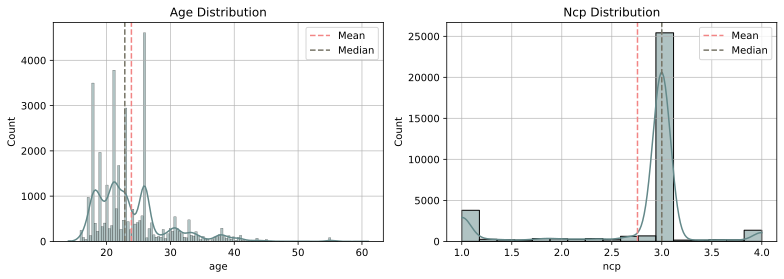

In [31]:
plt.figure(figsize=(11, 4))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(['age', 'ncp'], 1):
    plt.subplot(1, 2, i)  # Create subplot
    mean_values = df[col].mean()
    median = df[col].median()

    sns.histplot(df[col], kde=True, color='#638889')  # Plot histogram using seaborn
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Transformation

In [32]:
# Applying logarithmic transformation to the 'age' column using np.log1p() function.
df['age'] = np.log1p(df['age'])

# Applying cube root transformation to the 'ncp' column using np.cbrt() function.
df['ncp'] = np.cbrt(df['ncp'].values)

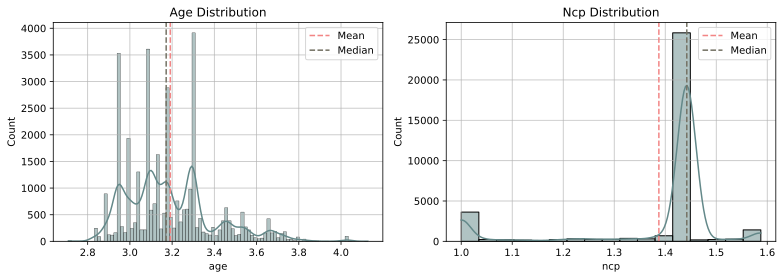

In [33]:
plt.figure(figsize=(11, 4))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(['age', 'ncp'], 1):
    plt.subplot(1, 2, i)  # Create subplot
    mean_values = df[col].mean()
    median = df[col].median()

    sns.histplot(df[col], kde=True, color='#638889')  # Plot histogram using seaborn
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Encoding categorical variables using one-hot encoding

In [34]:
# Encoding categorical variables using one-hot encoding.
encoded_data = pd.get_dummies(df[['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
                                   'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
                                   'calc', 'mtrans', 'bmi', 'age_group', 'height_bins', 'cluster',
                                   'negative_health_behavior']])




<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='sixth'></a> Data Splitting

<!-- </div> -->


In [35]:
# Slicing the encoded data to extract features (X) for training.
X = encoded_data.iloc[:len(train)]

# Slicing the target variable (y) for training.
y = df['nobeyesdad'].iloc[:len(train)]


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Feature Scaling

I decided to use RobustScaler instead of StandardScaler because RobustScaler is less prone to outliers. This can be especially beneficial in our case where the data might contain unexpected measurements or errors. While StandardScaler standardizes features by removing the mean and scaling to unit variance, it can often be influenced by outliers if the distribution is not Gaussian. On the other hand, RobustScaler uses a similar method but uses the median and the Interquartile Range (IQR), thus reducing the impact of outliers. This makes our model more robust and reliable.

In [36]:

# Create an instance of RobustScaler
scaler = RobustScaler()

# Scale the features in X using StandardScaler and fit_transform method
X_scaled = scaler.fit_transform(X)

# Save the Scaler
joblib.dump(scaler, './preprocessing/scaler.pkl')

['./preprocessing/scaler.pkl']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42) 

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='seventh'></a> Model Selection and Training

In [38]:

# Parameters for models
params = {
    'objective': 'multiclass',
    'num_class': 7,  # Specify the number of classes
    'metric': 'multi_logloss',  # Evaluation metric
    'lambda_l2': 0.1,
    'num_iterations': 100
}

# Define a dictionary of models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=7, random_state=42), 
    "CatBoost": CatBoostClassifier(loss_function='MultiClass', random_state=42, verbose=0, iterations=600, learning_rate=0.1, max_depth=5),
    "LightGBM": LGBMClassifier(**params, random_state=42, verbosity=-1)
}

# Initialize variables to track the best model and accuracy
best_model = None
best_accuracy = float('-inf')

# Iterate over models
for name, model in models.items():
    # Fit the model
    if name == 'XGBClassifier':
        # Map target labels to integers for XGBClassifier
        y_train_mapped = y_train.map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
                                      'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})
        model.fit(X_train, y_train_mapped)
    else:
        model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best model and accuracy if current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
    
    # Print model name and accuracy
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("="*40)

# Print best model and its accuracy
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)



Model: Logistic Regression
Accuracy: 0.8648843930635838
Model: Decision Tree
Accuracy: 0.8407996146435452
Model: Random Forest
Accuracy: 0.8934248554913294
Model: KNN
Accuracy: 0.7863680154142582
Model: SVM
Accuracy: 0.8736753371868978
Model: Gradient Boosting
Accuracy: 0.8965558766859345
Model: XGBClassifier
Accuracy: 0.0
Model: CatBoost
Accuracy: 0.9026974951830443
Model: LightGBM
Accuracy: 0.8999277456647399
Best Model: <catboost.core.CatBoostClassifier object at 0x133cc17d0>
Best Accuracy: 0.9026974951830443


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='nine'></a> Best Model Tuning

In [39]:
# Defining the number of epochs for optimization.
epoch = 10

# Defining the objective function for optimization using Optuna.
def objective(trial):    
    # Defining hyperparameters to optimize.
    param={ 'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),    
            'n_estimators': trial.suggest_int('n_estimators', 100, 550),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1.0),      
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.1, 1.0), 
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.1, 1.0)}
    
    # Initializing the LightGBM model with suggested hyperparameters.
    model = LGBMClassifier(random_state=42, verbosity=-1, **param)

    # Training the model.
    model.fit(X_train, y_train)
    
    # Making predictions on the test data.
    y_pred = model.predict(X_test)
    
    # Calculating and returning accuracy score.
    return accuracy_score(y_test, y_pred)

# Creating an Optuna study to maximize the objective function.
study = optuna.create_study(direction='maximize')

# Optimizing the objective function with a specified number of trials.
study.optimize(objective, n_trials=epoch)

# Printing the best parameters found during optimization.
print("Best params:", study.best_params)

# Printing the best accuracy score found during optimization.
print('Best score:', study.best_value)

# Creating the best model using the best parameters found during optimization.
best_model = LGBMClassifier(random_state=42, verbosity=-1, **study.best_params)
best_model.fit(X_train, y_train)

# Making predictions using the best model.
y_pred = best_model.predict(X_test)

# Calculating accuracy using the best model.
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy achieved by the best model.
print("Accuracy:", accuracy)




[I 2024-05-14 17:23:40,410] A new study created in memory with name: no-name-e4af74e2-2474-4e46-86e1-59ea00c32391
[I 2024-05-14 17:23:41,446] Trial 0 finished with value: 0.9053468208092486 and parameters: {'learning_rate': 0.06491894397386544, 'n_estimators': 240, 'reg_alpha': 0.050806935550483545, 'reg_lambda': 0.7064928951366711, 'max_depth': 5, 'colsample_bytree': 0.20215272922802646}. Best is trial 0 with value: 0.9053468208092486.
[I 2024-05-14 17:23:43,003] Trial 1 finished with value: 0.9034200385356455 and parameters: {'learning_rate': 0.0548537741356055, 'n_estimators': 206, 'reg_alpha': 0.28337753887066197, 'reg_lambda': 0.2906616878688122, 'max_depth': 15, 'colsample_bytree': 0.5793679772292759}. Best is trial 0 with value: 0.9053468208092486.
[I 2024-05-14 17:23:45,078] Trial 2 finished with value: 0.9046242774566474 and parameters: {'learning_rate': 0.03402040995527103, 'n_estimators': 280, 'reg_alpha': 0.49589155930735174, 'reg_lambda': 0.12867208773422073, 'max_depth': 

Best params: {'learning_rate': 0.06491894397386544, 'n_estimators': 240, 'reg_alpha': 0.050806935550483545, 'reg_lambda': 0.7064928951366711, 'max_depth': 5, 'colsample_bytree': 0.20215272922802646}
Best score: 0.9053468208092486
Accuracy: 0.9053468208092486


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='eighth'></a> Model Evaluation

In [46]:
# # Defining the best hyperparameters obtained from optimization or tuning.

# The Accuracy is: 0.9058285163776493
# params = {'learning_rate': 0.07154323713333346, 'n_estimators': 130, 'reg_alpha': 0.01253393614146488, 'reg_lambda': 0.9285581603248012,
#           'max_depth': 18, 'colsample_bytree': 0.2612927006834625}

# The Accuracy is: 0.9071531791907514
# params = {'learning_rate': 0.015803904254380784, 'n_estimators': 451, 'reg_alpha': 0.3253060099253056, 'reg_lambda': 0.3746332419726518, 
#           'max_depth': 22, 'colsample_bytree': 0.28642856146733825}

# The Accuracy is: 0.9071531791907514
# params: {'learning_rate': 0.036610351360747695, 'n_estimators': 281, 'reg_alpha': 0.32167862098477634, 'reg_lambda': 0.5053697997233765,
#          'max_depth': 13, 'colsample_bytree': 0.15396229373767722}

# The Accuracy is: 0.9078757225433526
params = {'learning_rate': 0.024609588211785202, 'n_estimators': 318, 'reg_alpha': 0.06075103081887072, 'reg_lambda': 0.7870852998559767,
         'max_depth': 19, 'colsample_bytree': 0.2640306069535822}

# Creating the best LightGBM model with the best hyperparameters.
best_model = LGBMClassifier(**params, random_state=42, verbosity=-1)
    
# Training the best model on the training data.
best_model.fit(X_train, y_train)

# Making predictions on the testing data.
y_pred = best_model.predict(X_test)

# Calculating accuracy of the best model.
accuracy = accuracy_score(y_test, y_pred)

# Generating classification report for the best model.
cls_report = classification_report(y_test, y_pred)

# Printing the accuracy achieved by the best model.
print(f'The Accuracy is: {accuracy}')

# Printing the classification report for the best model.
print(cls_report)



The Accuracy is: 0.9078757225433526
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94      1016
      Normal_Weight       0.88      0.89      0.89      1249
     Obesity_Type_I       0.89      0.87      0.88      1139
    Obesity_Type_II       0.96      0.98      0.97      1321
   Obesity_Type_III       1.00      1.00      1.00      1629
 Overweight_Level_I       0.79      0.79      0.79       955
Overweight_Level_II       0.81      0.82      0.82       995

           accuracy                           0.91      8304
          macro avg       0.90      0.90      0.90      8304
       weighted avg       0.91      0.91      0.91      8304



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Feature Importances

In [47]:
# Get feature importances
feature_importance = best_model.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Normalize importances to sum up to 1
features_df['Normalized_Importance'] = features_df['Importance'] / features_df['Importance'].sum()

# Display the top 30 most important features
top_30_features = features_df[['Feature', 'Normalized_Importance']].head(30)
print(top_30_features)


                                              Feature  Normalized_Importance
1                                              height               0.105587
2                                              weight               0.105315
8                                                 bmi               0.100684
0                                                 age               0.099438
6                                                 faf               0.068693
5                                                ch2o               0.064764
7                                                 tue               0.061378
3                                                fcvc               0.053664
4                                                 ncp               0.050230
26                                            calc_no               0.013368
25                                     calc_Sometimes               0.012873
11                  family_history_with_overweight_no               0.011420

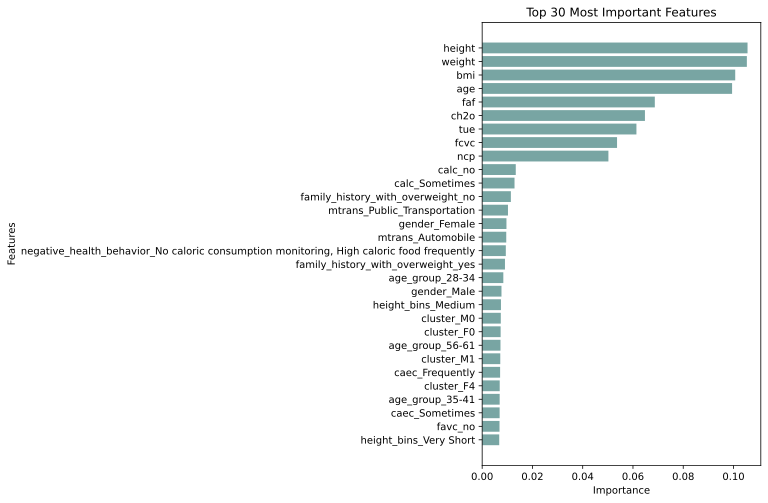

In [48]:
# Plotting
plt.figure(figsize=(5, 8))
plt.barh(top_30_features['Feature'], top_30_features['Normalized_Importance'], color='#78a5a3')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 30 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #a1d6e2); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='ten'></a> Test Data Submission

In [49]:

# Extracting the encoded data for the test set.
X_test_data = encoded_data.iloc[len(train):]

# Scaling the test data using the same scaler used for training data.
X_scaled = scaler.transform(X_test_data)

# Making predictions on the scaled test data using the best trained model.
y_pred = best_model.predict(X_scaled)

# Loading the sample submission file.
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission.head()


,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [50]:
# Assigning predicted values to the 'NObeyesdad' column in the sample submission dataframe.
sample_submission['NObeyesdad'] = y_pred

# Creating a copy of the sample submission dataframe for submission.
submission = sample_submission.copy()

# Displaying the first few rows of the submission dataframe.
submission.head()


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [51]:
# Specify the file path where you want to save the CSV file
file_path = "./data/submission.csv"

# Use pd.to_csv() to save the DataFrame to a CSV file
submission.to_csv(file_path, index=False)

# Reading the saved CSV file into a new dataframe for verification
submission = pd.read_csv('./data/submission.csv')

# Displaying the first few rows of the submission dataframe
submission.head()


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [52]:
!pip freeze > requirements.txt

In [53]:
!python3 --version

Python 3.11.7


In [54]:
!which python

/Users/sergey/.pyenv/versions/3.11.7/bin/python
